In [ ]:
import os
import random
import torch
import numpy as np
from torchvision import models
from torch import nn, optim
from torch.optim import lr_scheduler
from torchsummary import summary

from vgg_xs import VGG_XS
from data_loading import Data
from model_training import train_model, plot_training_history
from model_testing import test_model, plot_examples

In [2]:
random_seed = 42
random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
data = Data('C:/Users/weron/Pulpit/sem1/dl/proj1/archive')

In [5]:
model = VGG_XS(num_classes=len(data.class_names)).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           9,248
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
         MaxPool2d-7           [-1, 32, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          18,496
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
        MaxPool2d-11             [-1, 64, 8, 8]               0
           Conv2d-12            [-1, 128, 8, 8]          73,856
      BatchNorm2d-13            [-1, 128, 8, 8]             256
             ReLU-14            [-1, 12

In [ ]:
sample_input = torch.randn(1, 3, 32, 32).to(device)
model.eval()
with torch.no_grad():
    output = model(sample_input)
print(output.shape)

torch.Size([1, 10])


In [8]:
model, train_loss, train_acc, val_loss, val_acc = train_model(
    model, criterion, optimizer, exp_lr_scheduler, data.dataloaders, device, num_epochs=20
)

Epoch 0/19
----------
train Loss: 1.5067 Acc: 0.4452
valid Loss: 1.2580 Acc: 0.5379

Epoch 1/19
----------
train Loss: 1.2043 Acc: 0.5636
valid Loss: 1.1124 Acc: 0.5953

Epoch 2/19
----------
train Loss: 1.0797 Acc: 0.6159
valid Loss: 1.0816 Acc: 0.6119

Epoch 3/19
----------
train Loss: 0.9946 Acc: 0.6465
valid Loss: 0.9847 Acc: 0.6486

Epoch 4/19
----------
train Loss: 0.9264 Acc: 0.6718
valid Loss: 0.9184 Acc: 0.6689

Epoch 5/19
----------
train Loss: 0.8746 Acc: 0.6915
valid Loss: 0.8933 Acc: 0.6810

Epoch 6/19
----------
train Loss: 0.8283 Acc: 0.7078
valid Loss: 0.8846 Acc: 0.6851

Epoch 7/19
----------
train Loss: 0.7084 Acc: 0.7511
valid Loss: 0.7881 Acc: 0.7198

Epoch 8/19
----------
train Loss: 0.6755 Acc: 0.7638
valid Loss: 0.7781 Acc: 0.7248

Epoch 9/19
----------
train Loss: 0.6616 Acc: 0.7680
valid Loss: 0.7775 Acc: 0.7245

Epoch 10/19
----------
train Loss: 0.6499 Acc: 0.7728
valid Loss: 0.7752 Acc: 0.7271

Epoch 11/19
----------
train Loss: 0.6345 Acc: 0.7774
valid Loss

In [9]:
title = 'VGG_XS'
folder = os.path.join('experiments', title)
os.makedirs(folder, exist_ok=True)

torch.save(model.state_dict(), os.path.join(folder, 'best_model.pt'))

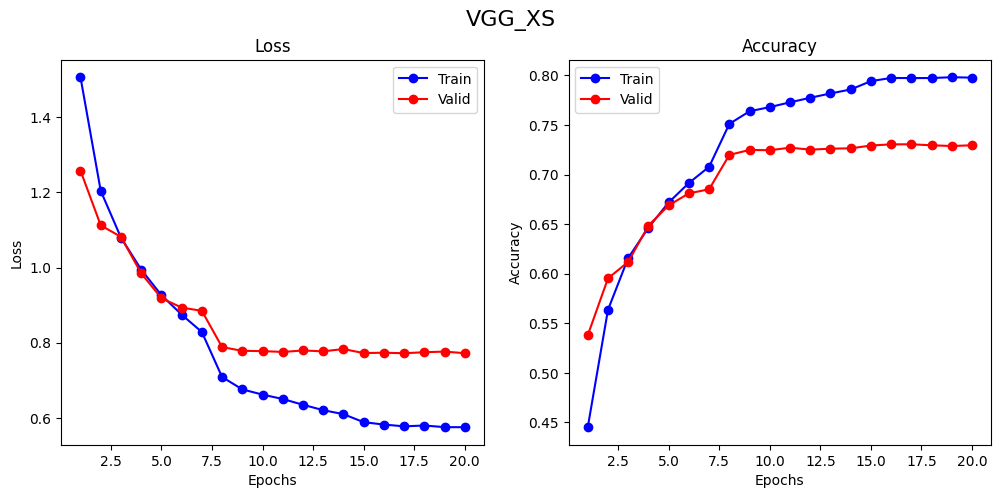

In [10]:
plot_training_history(train_loss, train_acc, val_loss, val_acc, title, folder)

In [11]:
test_model(model, data.dataloaders['test'], device, folder)

Accuracy: 0.7285

Classification Report:
              precision    recall  f1-score   support

    airplane       0.83      0.81      0.82      9000
  automobile       0.79      0.76      0.78      9000
        bird       0.69      0.69      0.69      9000
         cat       0.59      0.61      0.60      9000
        deer       0.65      0.67      0.66      9000
         dog       0.60      0.54      0.57      9000
        frog       0.82      0.82      0.82      9000
       horse       0.79      0.78      0.78      9000
        ship       0.78      0.82      0.80      9000
       truck       0.76      0.76      0.76      9000

    accuracy                           0.73     90000
   macro avg       0.73      0.73      0.73     90000
weighted avg       0.73      0.73      0.73     90000



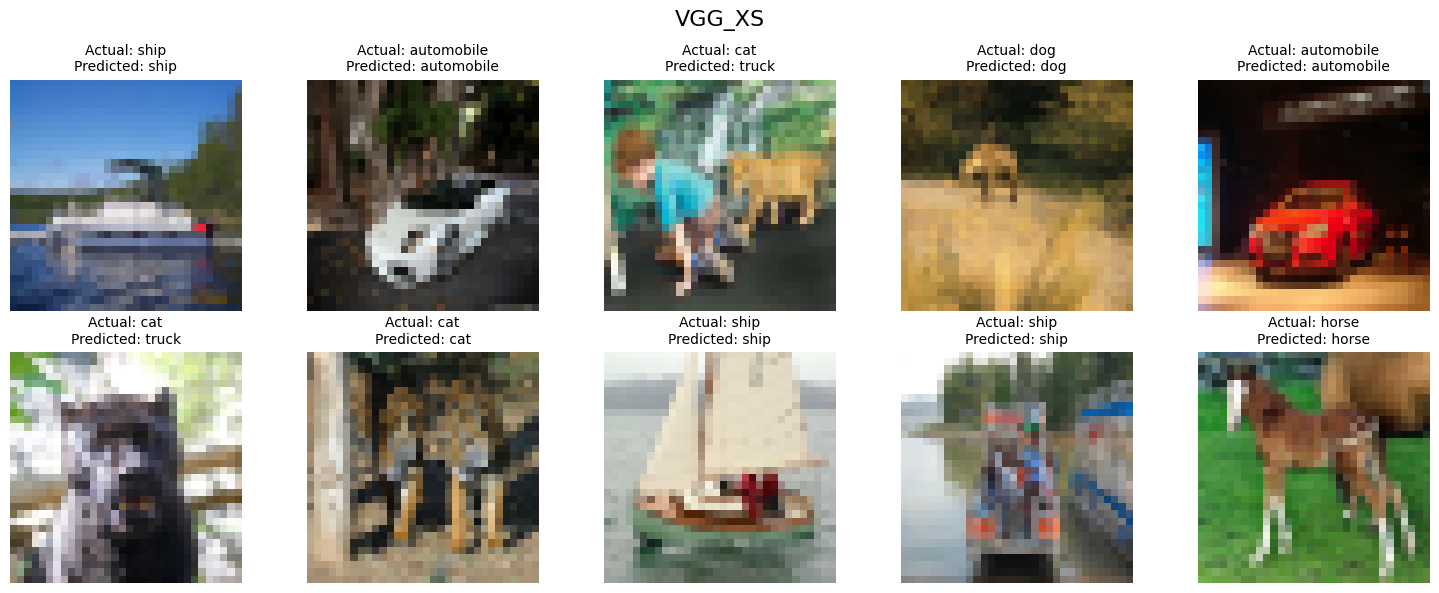

In [17]:
plot_examples(model, data.dataloaders['test'], device, data.class_names,folder, title)